In [1]:
#basic
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

#sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

The code below works with the X_train set saved from the first step of data pre-processing: missing value imputation.

In this notebook, I tackle categorical variables by encoding them. Afterwards, I will deal with rare labels.

In [2]:
#1st step - import the X_test and X_train data
X_train = pd.read_csv('X_train_2.csv',index_col=[0])
X_test = pd.read_csv('X_test_2.csv',index_col=[0])

In [3]:
X_train.isnull().sum()
#no missing values anymore

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 79, dtype: int64

In [4]:
#make a list of categorical variables
cat_vars = X_train.select_dtypes(include=['object']).columns

In [5]:
pd.set_option('display.max_columns', 20)
X_train[cat_vars].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,MiscFeature,SaleType,SaleCondition
615,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,Missing,Attchd,RFn,TA,TA,Y,MnPrv,Missing,WD,Abnorml
613,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Feedr,...,Missing,Missing,Missing,Missing,Missing,Y,Missing,Missing,New,Partial
1303,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,...,Missing,Attchd,RFn,TA,TA,Y,Missing,Missing,WD,Normal
486,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Missing,Attchd,RFn,TA,TA,Y,Missing,Missing,WD,Normal
561,RL,Pave,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,TA,Attchd,RFn,TA,TA,Y,Missing,Missing,WD,Normal


In [6]:
#print all the categories in the training set
for col in cat_vars:
    print(col, ":", X_train[col].unique())

MSZoning : ['RL' 'RM' 'C (all)' 'RH' 'FV']
Street : ['Pave' 'Grvl']
Alley : ['Grvl' 'Pave']
LotShape : ['Reg' 'IR1' 'IR3' 'IR2']
LandContour : ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities : ['AllPub' 'NoSeWa']
LotConfig : ['Inside' 'Corner' 'FR2' 'CulDSac' 'FR3']
LandSlope : ['Gtl' 'Mod' 'Sev']
Neighborhood : ['NAmes' 'Mitchel' 'Somerst' 'Edwards' 'SWISU' 'CollgCr' 'StoneBr'
 'Veenker' 'Timber' 'Gilbert' 'SawyerW' 'BrkSide' 'NWAmes' 'OldTown'
 'IDOTRR' 'NridgHt' 'NoRidge' 'Sawyer' 'ClearCr' 'Crawfor' 'BrDale'
 'Blmngtn' 'MeadowV' 'NPkVill' 'Blueste']
Condition1 : ['Feedr' 'Norm' 'RRAn' 'Artery' 'PosN' 'RRNn' 'RRAe' 'PosA' 'RRNe']
Condition2 : ['Norm' 'Feedr' 'RRAe' 'PosN' 'Artery' 'RRAn']
BldgType : ['1Fam' 'TwnhsE' 'Duplex' 'Twnhs' '2fmCon']
HouseStyle : ['SFoyer' '1Story' '2Story' 'SLvl' '1.5Fin' '2.5Unf' '1.5Unf' '2.5Fin']
RoofStyle : ['Gable' 'Hip' 'Mansard' 'Flat' 'Shed' 'Gambrel']
RoofMatl : ['CompShg' 'Metal' 'Tar&Grv' 'WdShake' 'ClyTile' 'WdShngl' 'Roll']
Exterior1st : ['MetalSd' 'Vinyl

A few observations from the list of variables:
 - Alley and Street seem to be very similar variables, since Alley was highly missing and we imputed it with random values, perhaps it is better to just remove the variables, as it is less representative of the reality than the Street variable.
 - none of the variables are actually strings of text - this means all can be encoded.
 - since there are many variables, in order not to increase the dimensionality of the data frame, I will not use the OneHotEncoding technique.
 - since I ultimately want to use a linear model, I will use either ordered cardinal encoding or mean variable encoding.

In [7]:
#first, drop 'Alley' from both train and test sets
X_train = X_train.drop('Alley',axis=1)
X_test = X_test.drop('Alley', axis=1)

In [8]:
#redo the categorical vars list  
cat_vars = X_train.select_dtypes(include=['object']).columns
cat_vars

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')

/Users/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  after removing the cwd from sys.path.


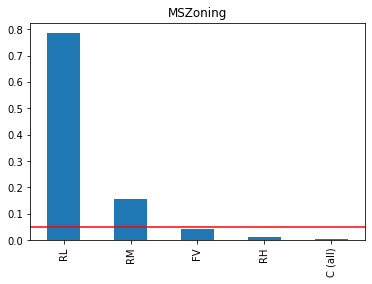

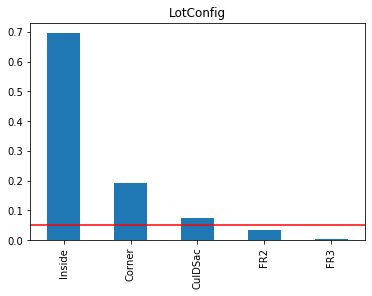

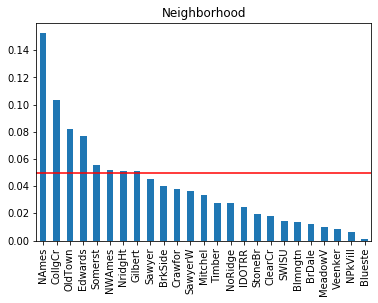

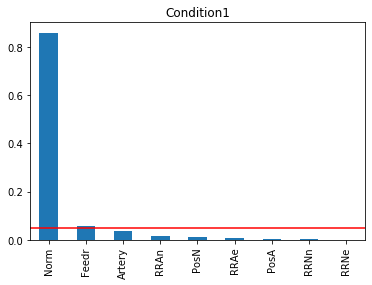

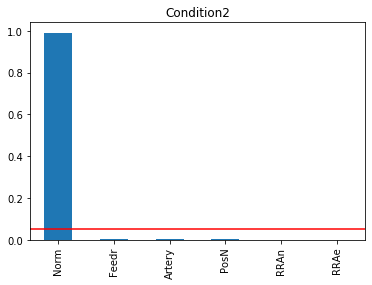

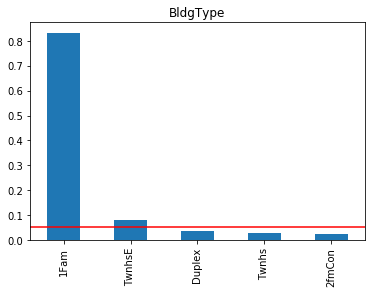

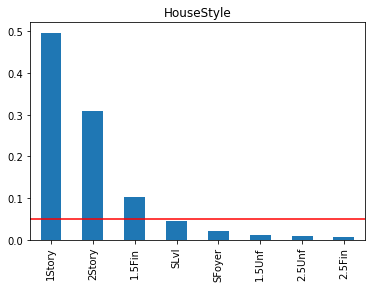

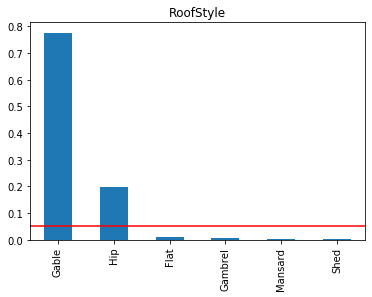

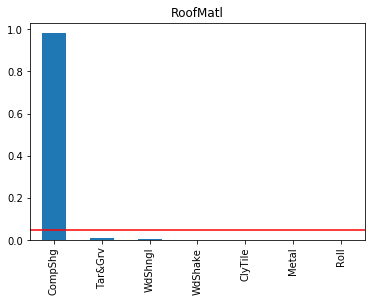

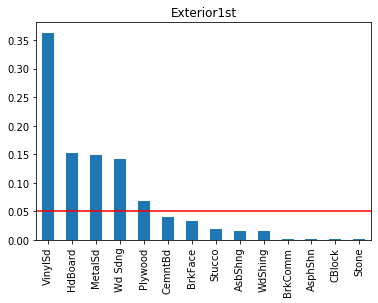

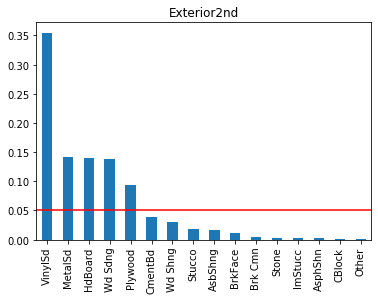

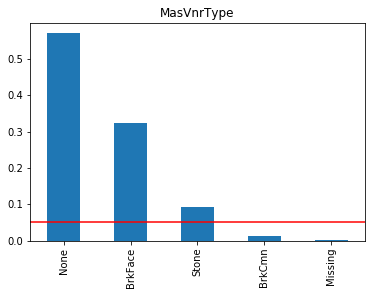

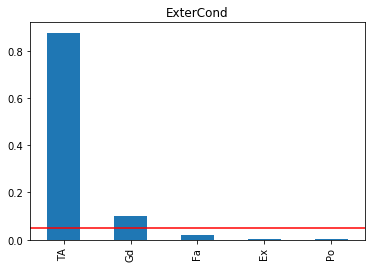

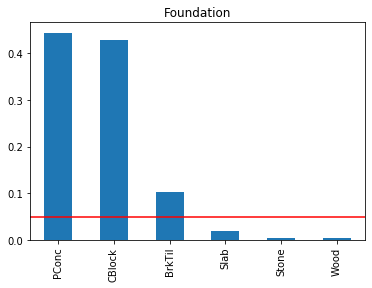

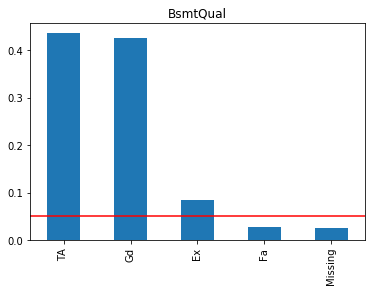

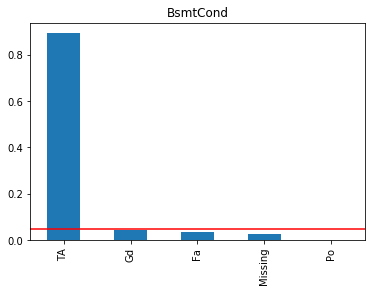

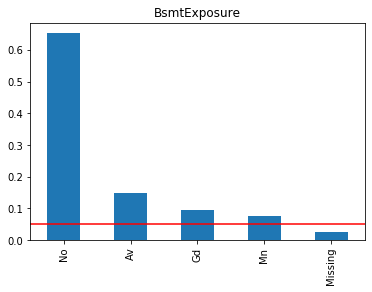

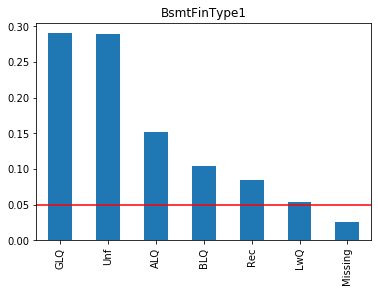

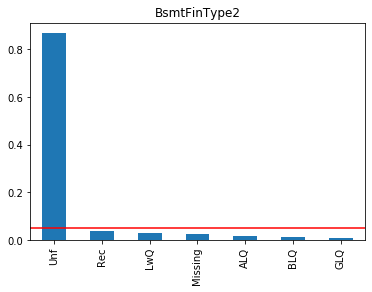

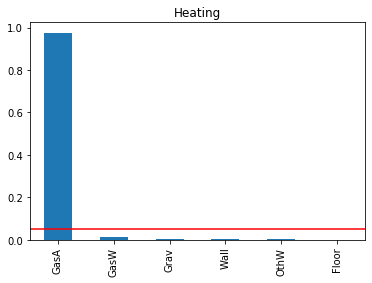

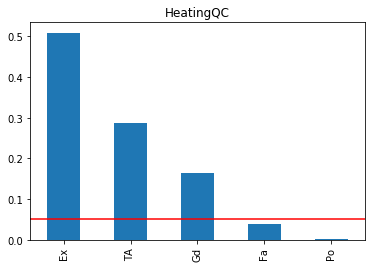

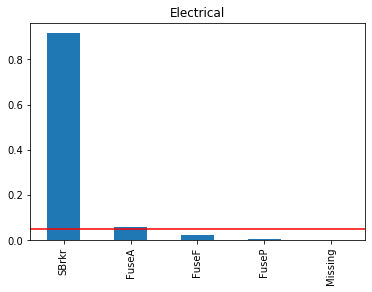

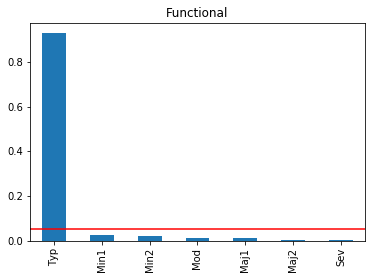

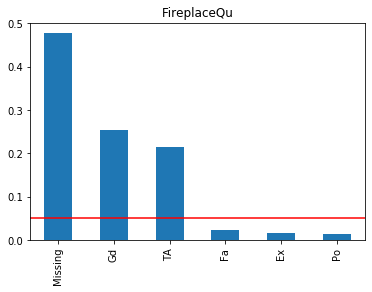

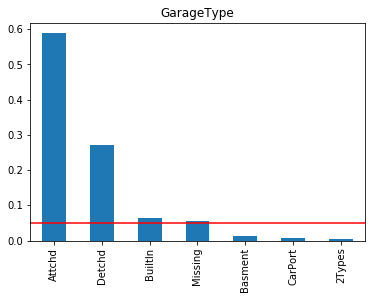

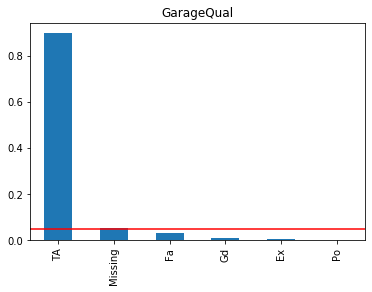

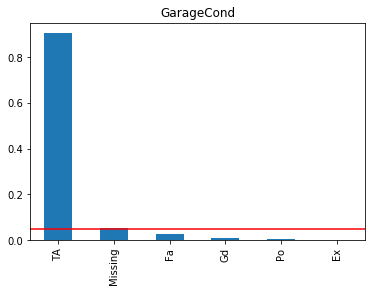

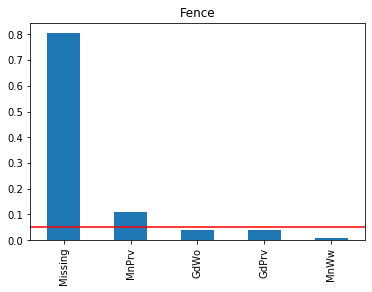

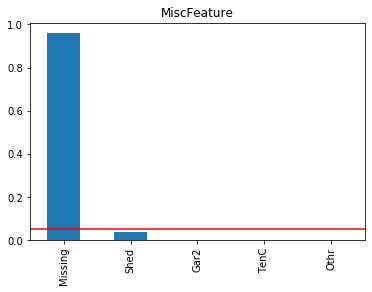

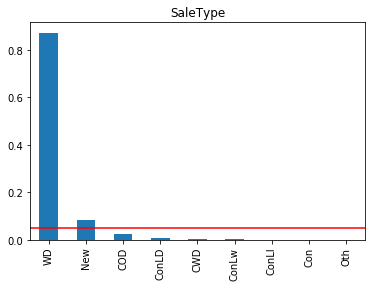

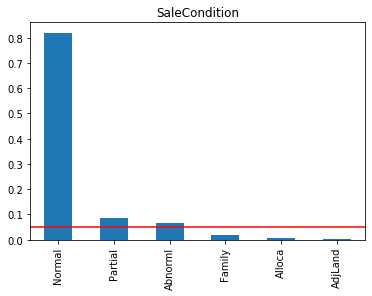

In [9]:
for col in cat_vars:
    if X_train[col].nunique() >= 5:
        tempdf = pd.Series(X_train[col].value_counts() / len(X_train))
        tempdf.plot('bar')
        plt.axhline(0.05, color='red')
        plt.title(col)
        plt.show()
        
#Will rare label encode these highy cardinal variables. In addition, these do not have
#previously created missing categories, thus the previous effort won't be duplicated.

In [10]:
#make a list of variables that will be RareLabelCategorically encoded
rare_list  = []

for col in cat_vars:
    if X_train[col].nunique() >= 5:
        rare_list.append(col)
        print(rare_list)

['MSZoning']
['MSZoning', 'LotConfig']
['MSZoning', 'LotConfig', 'Neighborhood']
['MSZoning', 'LotConfig', 'Neighborhood', 'Condition1']
['MSZoning', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2']
['MSZoning', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType']
['MSZoning', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle']
['MSZoning', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle']
['MSZoning', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl']
['MSZoning', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st']
['MSZoning', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd']
['MSZoning', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'R

In [11]:
cardinal = ['MSZoning', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical', 'Functional', 'FireplaceQu', 'GarageType', 'GarageQual', 'GarageCond', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

In [12]:
cardinal

['MSZoning',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'Electrical',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageQual',
 'GarageCond',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [13]:
from feature_engine.categorical_encoders import RareLabelCategoricalEncoder

In [14]:
rare_enc = RareLabelCategoricalEncoder(tol=0.05, variables=['MSZoning',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'Electrical',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageQual',
 'GarageCond',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition'])
rare_enc.fit(X_train)

RareLabelCategoricalEncoder(n_categories=10, tol=0.05,
                            variables=['MSZoning', 'LotConfig', 'Neighborhood',
                                       'Condition1', 'Condition2', 'BldgType',
                                       'HouseStyle', 'RoofStyle', 'RoofMatl',
                                       'Exterior1st', 'Exterior2nd',
                                       'MasVnrType', 'ExterCond', 'Foundation',
                                       'BsmtQual', 'BsmtCond', 'BsmtExposure',
                                       'BsmtFinType1', 'BsmtFinType2',
                                       'Heating', 'HeatingQC', 'Electrical',
                                       'Functional', 'FireplaceQu',
                                       'GarageType', 'GarageQual', 'GarageCond',
                                       'Fence', 'MiscFeature', 'SaleType', ...])

In [15]:
X_train = rare_enc.transform(X_train)
X_test = rare_enc.transform(X_test)

In [16]:
X_train['Neighborhood'].unique()
#the procedure worked - there is a new category "Rare"

array(['NAmes', 'Rare', 'Somerst', 'Edwards', 'CollgCr', 'Gilbert',
       'NWAmes', 'OldTown', 'NridgHt'], dtype=object)

After working with the sets further, I noticed that after the encoding steps, there were soem features with missing values in the test set. These occured because test set had some unseen labels that the dictonary used at the encoding stage did not how to deal with. 

To deal with this, I extend the rare label encoding criterion to deal with categorical data that has more than 5, rather than more than 7 categories. With an increased tolerace level of 5%.

However, for three variables, the tranformer does not create rare values in train: Electrical, Condition2, RoofMatl. Will try again.

In [17]:
X_train['RoofMatl'].value_counts() / len(X_train)

CompShg    0.982618
Tar&Grv    0.009202
WdShngl    0.003067
WdShake    0.002045
ClyTile    0.001022
Metal      0.001022
Roll       0.001022
Name: RoofMatl, dtype: float64

In [18]:
print(X_train['Condition2'].unique())
print(X_test['Condition2'].unique())

['Norm' 'Feedr' 'RRAe' 'PosN' 'Artery' 'RRAn']
['Norm' 'Feedr' 'Rare']


In [19]:
#will do this manually
def find_non_rare_labels(df, variable, tolerance):
    
    temp = df.groupby([variable])[variable].count() / len(df)
    
    non_rare = [x for x in temp.loc[temp>tolerance].index.values]
    
    return non_rare

[x for x in X_train['Condition2'].unique(
) if x not in find_non_rare_labels(X_train, 'Condition2', 0.05)]

['Feedr', 'RRAe', 'PosN', 'Artery', 'RRAn']

In [20]:
def rare_encoding(X_train, X_test, variable, tolerance):

    X_train = X_train.copy()
    X_test = X_test.copy()

    # find the most frequent category
    frequent_cat = find_non_rare_labels(X_train, variable, tolerance)

    # re-group rare labels
    X_train[variable] = np.where(X_train[variable].isin(
        frequent_cat), X_train[variable], 'Rare')
    
    X_test[variable] = np.where(X_test[variable].isin(
        frequent_cat), X_test[variable], 'Rare')

    return X_train, X_test

In [21]:
for variable in ['Condition2', 'RoofMatl', 'Electrical']:
    
    X_train, X_test = rare_encoding(X_train, X_test, variable, 0.05)

In [22]:
print(X_train['RoofMatl'].unique())
print(X_test['RoofMatl'].unique())

['CompShg' 'Rare']
['CompShg' 'Rare']


In [23]:
#save the updated data frames for future reference and before executing more pre-processing steps:
X_train.to_csv('X_train_3.csv')
X_test.to_csv('X_test_3.csv')

Now, proceed to encoding the categorical variables.

In [24]:
def ordinal_enc(var, target):
    ordered_labels = X_train.groupby([var])[target].mean().sort_values().index
    return {k: i for i, k in enumerate(ordered_labels, 0)}
    
def impose_enc(train, test, var, mapping):
    X_train[var] = X_train[var].map(mapping)
    X_test[var] = X_test[var].map(mapping)

In [25]:
cat_vars

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [26]:
for variable in cat_vars:
    mapping = ordinal_enc(variable, 'SalePrice')
    impose_enc(X_train, X_test, variable, mapping)


In [27]:
X_train[cat_vars].head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,MiscFeature,SaleType,SaleCondition
615,3,1,0,1,1,2,0,2,2,1,...,1,5,2,3,5,2,2,2,5,1
613,3,1,0,1,1,2,0,3,2,1,...,1,0,0,0,0,2,4,2,7,5
1303,3,1,0,1,1,2,0,7,3,1,...,1,5,2,3,5,2,4,2,5,3
486,3,1,0,1,1,2,0,2,3,1,...,1,5,2,3,5,2,4,2,5,3
561,3,1,0,1,1,2,1,3,3,1,...,3,5,2,3,5,2,4,2,5,3


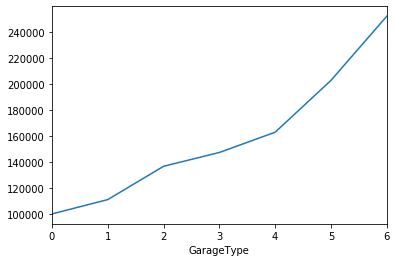

In [28]:
#quick test to see the relationship between a sample variable and the outcome
X_train.groupby(['GarageType'])['SalePrice'].mean().plot()
#it's linear - a good sign for future linear model application

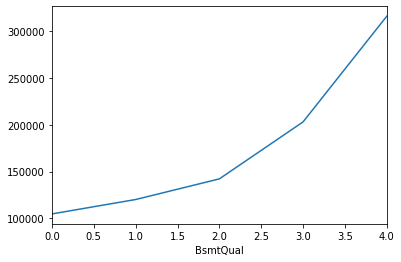

In [30]:
X_train.groupby(['BsmtQual'])['SalePrice'].mean().plot()

Before saving the newly encoded dataset, I will deal with rare labels by using feature engine Rare label categorical encoder.

In [32]:
X_test.isnull().sum().sort_values(ascending=False)

SalePrice       0
BsmtQual        0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
               ..
TotRmsAbvGrd    0
Functional      0
Fireplaces      0
FireplaceQu     0
MSSubClass      0
Length: 78, dtype: int64

In [33]:
#save the X_test AND X_train sets so that in the future we could compare ordered cardinal encoding
#with the mean encoding methods, for which is a bettwe method to use in the ML algorithm.
X_train.to_csv('X_train_OCE.csv')
X_test.to_csv('X_test_OCE.csv')

The second method I will apply is mean encoding.

In [46]:
#first - reimport the original train and test sets with imputed missing values.
X_train = pd.read_csv('X_train_3.csv',index_col=[0])
X_test = pd.read_csv('X_test_3.csv',index_col=[0])

In [47]:
print(X_train['Street'].unique())
print(X_test['Street'].unique())

['Pave' 'Grvl']
['Pave' 'Grvl']


In [48]:
# for encoding with feature-engine
from feature_engine.categorical_encoders import MeanCategoricalEncoder

In [49]:
mce = MeanCategoricalEncoder()

In [50]:
X_test.isnull().sum().sort_values(ascending=False)

SalePrice       0
BsmtQual        0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
               ..
TotRmsAbvGrd    0
Functional      0
Fireplaces      0
FireplaceQu     0
MSSubClass      0
Length: 78, dtype: int64

In [51]:
mce.fit(X_train, X_train['SalePrice'])

MeanCategoricalEncoder(variables=['MSZoning', 'Street', 'LotShape',
                                  'LandContour', 'Utilities', 'LotConfig',
                                  'LandSlope', 'Neighborhood', 'Condition1',
                                  'Condition2', 'BldgType', 'HouseStyle',
                                  'RoofStyle', 'RoofMatl', 'Exterior1st',
                                  'Exterior2nd', 'MasVnrType', 'ExterQual',
                                  'ExterCond', 'Foundation', 'BsmtQual',
                                  'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                                  'BsmtFinType2', 'Heating', 'HeatingQC',
                                  'CentralAir', 'Electrical', 'KitchenQual', ...])

In [52]:
X_train = mce.transform(X_train)
X_test = mce.transform(X_test)

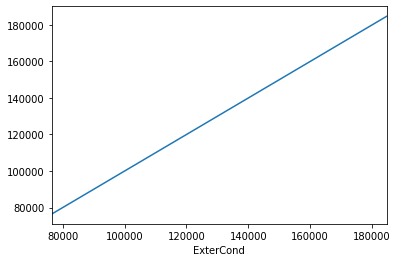

In [53]:
X_train.groupby('ExterCond')['SalePrice'].mean().plot()

In [ ]:
#save the other set of train and test vars for later comparison
X_train.to_csv('X_train_MCE.csv')
X_test.to_csv('X_test_MCE.csv')

In [ ]:
X_train['Neighborhood'].unique()

In [ ]:
X_test33.isnull().sum().sort_values(ascending=False)